In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
raw_data = pd.read_excel('tala.xlsx')
print(raw_data)
U = 4.9

    nr.pom  czas  temp
0        1     0    22
1        2     1    23
2        3     2    24
3        4     3    25
4        5     4    27
5        6     5    28
6        7     6    29
7        8     7    30
8        9     8    32
9       10     9    33
10      11    10    34
11      12    11    35
12      13    12    36
13      14    13    37
14      15    14    38
15      16    15    39
16      17    16    40
17      18    17    41
18      19    18    42
19      20    19    43
20      21    20    44
21      22    21    45
22      23    22    46
23      24    23    47
24      25    24    48
25      26    25    49
26      27    26    50


Zmiana oporu od temperatury

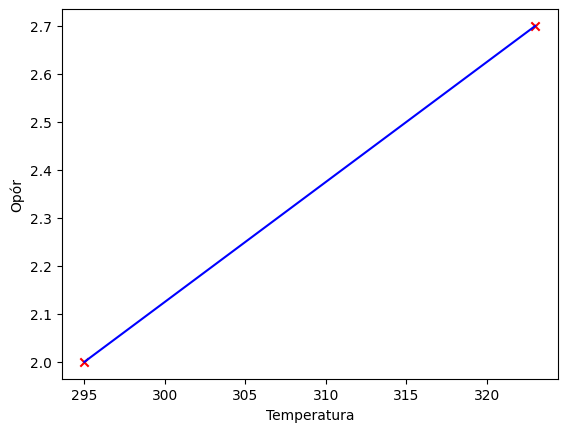

In [3]:
R_mierzone = [2,2.7]
Temp = [22+273,50+273]
from scipy.stats import linregress
model = linregress(Temp,R_mierzone)
T = np.linspace(22+273,50+273)
plt.scatter(Temp,R_mierzone,marker = 'x',c = 'r')
plt.plot(T,model.slope*T + model.intercept,c = 'b')
plt.xlabel('Temperatura')
plt.ylabel('Opór')
plt.show()

Wyznaczenie chwilowej mocy

In [4]:
temp_K = raw_data.loc[:,'temp'] + 273
P = np.array(U**2/(model.slope*temp_K+model.intercept))
print(P)

[12.005      11.85679012 11.71219512 11.57108434 11.29882353 11.16744186
 11.03908046 10.91363636 10.67111111 10.55384615 10.43913043 10.32688172
 10.21702128 10.10947368 10.00416667  9.90103093  9.8         9.7010101
  9.604       9.50891089  9.41568627  9.32427184  9.23461538  9.14666667
  9.06037736  8.97570093  8.89259259]


Obliczanie dostarczonego ciepła

temp    29.564023
dtype: float64


C:\Users\karol\AppData\Local\Temp\ipykernel_23992\1228095734.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(temp_K,results.params[0]*temp_K,c='r')


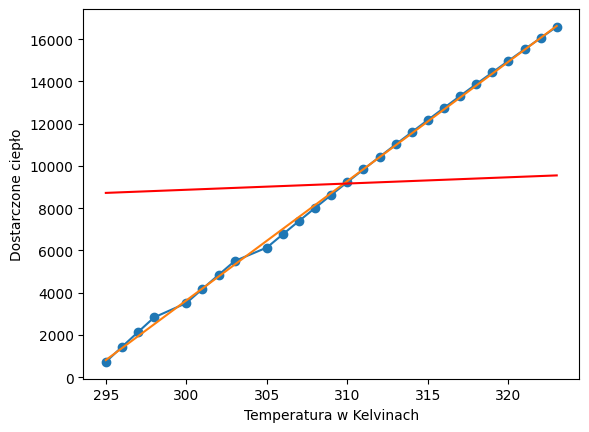

In [5]:


Dostarczone_ciepło = [12.005*60]
for i in P[1:]:
    Dostarczone_ciepło.append(Dostarczone_ciepło[-1] + i*60)
m2 = linregress(temp_K,Dostarczone_ciepło)
m = 131.353e-3
plt.plot(temp_K,Dostarczone_ciepło,marker = 'o')
plt.plot(temp_K,m2.slope*temp_K + m2.intercept)
from statsmodels.api import OLS
model = OLS(Dostarczone_ciepło,temp_K,hasconst=False)
results = model.fit()
print(results.params)
plt.plot(temp_K,results.params[0]*temp_K,c='r')
plt.xlabel('Temperatura w Kelvinach')
plt.ylabel('Dostarczone ciepło')
plt.show()

Obliczanie ciepła właściwego i niepewności.

Cw = a/m 

u(Cw) = sqrt((u(a)/m)^2 + (a*u(m)/m^2)^2)

In [6]:
import math
Cw = m2.slope/m - 27e-3*859/m
u_m = 0.001e-3/math.sqrt(3)
u_Cw = math.sqrt((m2.stderr/m)**2 + (m2.slope*u_m/(m**2))**2)
print(f'Współczynnik nachylenia wynosi {m2.slope} a jego niepewność {m2.stderr}')
print(f'Wyznaczone ciepło właściwe wynosi: {Cw}\nJego niepewność wynosi: {u_Cw}')
print(m2.intercept)


Współczynnik nachylenia wynosi 564.90692007769 a jego niepewność 3.1609984728090534
Wyznaczone ciepło właściwe wynosi: 4124.107710350658
Jego niepewność wynosi: 24.064920085716818
-165839.85243077812
